_**DELETE BEFORE PUBLISHING**_

_This is a template also containing the style guide for use cases. The styling uses the use-case css when uploaded to the website, which will not be visible on your local machine._

_Change any text marked with {} and delete any cells marked DELETE_

***

In [ ]:
# DELETE BEFORE PUBLISHING
# This is just here so you can preview the styling on your local machine

from IPython.core.display import HTML
HTML("""
<style>
.usecase-title, .usecase-duration, .usecase-section-header {
    padding-left: 15px;
    padding-bottom: 10px;
    padding-top: 10px;
    padding-right: 15px;
    background-color: #0f9295;
    color: #fff;
}

.usecase-title {
    font-size: 1.7em;
    font-weight: bold;
}

.usecase-authors, .usecase-level, .usecase-skill {
    padding-left: 15px;
    padding-bottom: 7px;
    padding-top: 7px;
    background-color: #baeaeb;
    font-size: 1.4em;
    color: #121212;
}

.usecase-level-skill  {
    display: flex;
}

.usecase-level, .usecase-skill {
    width: 50%;
}

.usecase-duration, .usecase-skill {
    text-align: right;
    padding-right: 15px;
    padding-bottom: 8px;
    font-size: 1.4em;
}

.usecase-section-header {
    font-weight: bold;
    font-size: 1.5em;
}

.usecase-subsection-header, .usecase-subsection-blurb {
    font-weight: bold;
    font-size: 1.2em;
    color: #121212;
}

.usecase-subsection-blurb {
    font-size: 1em;
    font-style: italic;
}
</style>
""")

<div class="usecase-title"> Urban Development Analysis </div>

<div class="usecase-authors"><b>Authored by: </b> Daljeet Kaur </div>

<div class="usecase-duration"><b>Duration:</b> {90} mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>{Intermediate}</div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b>Python</div>
</div>

<h2>Scenario</h2>
<div>The city of melbourne is experiencing rapid population growth and urbanization, presenting both opportunities and challenges for sustainable development. My objective is to analyze various datasets related to urban planning, infrastructure, transportation, housing, and economic development to inform stakeholders and develop strategies for managing and enhancing urban areas.
And  I have to analyse the dataset includes information on zoning regulations, land use plans, building permits, and development proposals across different neighborhoods in Melbourne and the dataset provides This dataset provides details on public transportation networks, road infrastructure,housing prices, rental rates, vacancy rates, housing affordability indices and also offers insights into the local economy, including employment trends, business growth rates.
With the dataset I will analyze Melbourne's urban planning data to identify development patterns, such as areas experiencing rapid growth, redevelopment opportunities, and underutilized spaces that could be repurposed for urban revitalization projects and I aim to provide valuable insights and recommendations to stakeholders, giving the information on decision making and enhance urban areas in Melbourne City effectively</div>

<h3>What this use case will teach you</h3>

At the end of this use case you will:
* In this usecase I would be learning various data analysis techniques, including data cleaning, data visualization, statistical analysis, and predictive modeling, to derive insights from complex urban datasets.
*I will  gain a deeper understanding of urban planning, transportation systems, housing markets, economic development, which are crucial for managing and enhancing urban areas.
*I will  become proficient in using data science tools and technologies such as Python programming and machine learning algorithms to analyze and interpret urban datasets effectively.
* I would like to upskill to identify key challenges and opportunities in urban development, formulate hypotheses, and figure out solutions to address them.
* At the end of the project I will gain experience in managing data science projects from end to end, including data collection, preprocessing, analysis, interpretation, and presentation of results to stakeholders.

<h3>Introduction</h3>

The Urban Development Analysis use case I aim is to use the dataset from the city of melbourne to provide the insight and to address the challenges of managing and enhancing urban areas. In this prjoect I am using the key datasets, including the Development Activity Monitor, High Rise Residents Profile 2016, and Business Establishments and Jobs Data, provide valuable information on urban planning, demographics, and economic dynamics.

The objective is to analyze these datasets completely to understand development trends, demographic patterns, and economic dynamics within the urban landscape. The stakeholders can make informed decisions and develop strategies to promote sustainable growth and improvement in urban areas and enable them to shape the future of urban development in a strategic and sustainable manner.

<h4>Dataset List</h4>

* Development Activity Monitor
* High Rise Residents Profile 2016
* Business establishments and jobs data by business size and industry


In [ ]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import requests
import os
import json
import io
import warnings
from scipy.stats import norm


In [ ]:
def download_and_load_csv(url):
    response = requests.get(url)
    csv_string = response.content.decode('utf-8')
    df = pd.read_csv(io.StringIO(csv_string))
    return df

# API Link
download_link_1 = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/development-activity-monitor/exports/csv?lang=en&timezone=Australia%2FSydney&use_labels=true&delimiter=%2C'
download_link_2 = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/high-rise-residents-profile-2016/exports/csv?lang=en&timezone=Australia%2FSydney&use_labels=true&delimiter=%2C'
download_link_3 = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/business-establishments-and-jobs-data-by-business-size-and-industry/exports/csv?lang=en&timezone=Australia%2FSydney&use_labels=true&delimiter=%2C'
# Use functions to download and load data
df1 = download_and_load_csv(download_link_1)
df2 = download_and_load_csv(download_link_2)
df3 = download_and_load_csv(download_link_3)

In [ ]:
dataset1 = pd.DataFrame(df1)
display(dataset1)

,data_format,development_key,status,year_completed,clue_small_area,clue_block,street_address,property_id,property_id_2,property_id_3,...,hospital_flr,recreation_flr,publicdispaly_flr,community_flr,car_spaces,bike_spaces,town_planning_application,longitude,latitude,geopoint
0,Pre May 16,X000479,COMPLETED,2006.0,North Melbourne,342,191-201 Abbotsford Street NORTH MELBOURNE VIC ...,100023,NaN,NaN,...,0,0,0,0,0,0,0,144.945030,-37.802822,"-37.80282184, 144.9450298"
1,Pre May 16,X000459,COMPLETED,2005.0,North Melbourne,333,218-224 Abbotsford Street NORTH MELBOURNE VIC ...,100119,NaN,NaN,...,0,0,0,0,0,0,0,144.945947,-37.802049,"-37.80204879, 144.9459475"
2,Pre May 16,X000573,COMPLETED,2013.0,West Melbourne (Residential),414,56-62 Abbotsford Street WEST MELBOURNE VIC 3003,100144,NaN,NaN,...,0,0,0,0,0,0,0,144.944719,-37.806791,"-37.80679128, 144.9447186"
3,Pre May 16,X000563,COMPLETED,2014.0,West Melbourne (Residential),409,1-9 Stawell Street WEST MELBOURNE VIC 3003,100441,NaN,NaN,...,0,0,0,0,0,28,0,144.942096,-37.806072,"-37.80607242, 144.9420962"
4,Pre May 16,X000997,COMPLETED,2007.0,North Melbourne,1012,229-235 Arden Street NORTH MELBOURNE VIC 3051,100556,NaN,NaN,...,0,0,0,0,0,0,0,144.939286,-37.800374,"-37.80037382, 144.9392856"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1425,Post May 16,X0011610,UNDER CONSTRUCTION,NaN,Kensington,2547,"402-432 Macaulay Road, Kensington, 3031",615587,615581.0,NaN,...,0,0,0,0,161,337,TPM-2021-19,144.932814,-37.794216,"-37.79421598, 144.9328137"
1426,Post May 16,X0011611,UNDER CONSTRUCTION,NaN,Kensington,2547,"402-432 Macaulay Road, Kensington, 3031",615587,615581.0,NaN,...,0,0,0,0,0,0,TPM-2021-19,144.932814,-37.794216,"-37.79421598, 144.9328137"
1427,Post May 16,X0011612,UNDER CONSTRUCTION,NaN,Kensington,2547,"402-432 Macaulay Road, Kensington, 3031",615587,615581.0,NaN,...,0,0,0,0,0,0,TPM-2021-19,144.932814,-37.794216,"-37.79421598, 144.9328137"
1428,Post May 16,X0011613,UNDER CONSTRUCTION,NaN,Kensington,2547,"402-432 Macaulay Road, Kensington, 3031",615587,615581.0,NaN,...,0,0,0,0,0,0,TPM-2021-19,144.932814,-37.794216,"-37.79421598, 144.9328137"


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1430 entries, 0 to 1429
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   data_format                  1430 non-null   object 
 1   development_key              1430 non-null   object 
 2   status                       1430 non-null   object 
 3   year_completed               1036 non-null   float64
 4   clue_small_area              1430 non-null   object 
 5   clue_block                   1430 non-null   int64  
 6   street_address               1430 non-null   object 
 7   property_id                  1430 non-null   int64  
 8   property_id_2                177 non-null    float64
 9   property_id_3                39 non-null     float64
 10  property_id_4                14 non-null     float64
 11  property_id_5                3 non-null      float64
 12  floors_above                 1430 non-null   int64  
 13  resi_dwellings    

In [ ]:
dataset1.shape

(1430, 42)

In [ ]:
dataset1.isna().sum()

data_format                       0
development_key                   0
status                            0
year_completed                  394
clue_small_area                   0
clue_block                        0
street_address                    0
property_id                       0
property_id_2                  1253
property_id_3                  1391
property_id_4                  1416
property_id_5                  1427
floors_above                      0
resi_dwellings                    0
studio_dwe                        0
one_bdrm_dwe                      0
two_bdrm_dwe                      0
three_bdrm_dwe                    0
student_apartments                0
student_beds                      0
student_accommodation_units       0
institutional_accom_beds          0
hotel_rooms                       0
serviced_apartments               0
hotels_serviced_apartments        0
hostel_beds                       0
childcare_places                  0
office_flr                  

In [ ]:
dataset1.dropna(inplace = True)

In [ ]:
dataset1.isna().sum()

data_format                    0.0
development_key                0.0
status                         0.0
year_completed                 0.0
clue_small_area                0.0
clue_block                     0.0
street_address                 0.0
property_id                    0.0
property_id_2                  0.0
property_id_3                  0.0
property_id_4                  0.0
property_id_5                  0.0
floors_above                   0.0
resi_dwellings                 0.0
studio_dwe                     0.0
one_bdrm_dwe                   0.0
two_bdrm_dwe                   0.0
three_bdrm_dwe                 0.0
student_apartments             0.0
student_beds                   0.0
student_accommodation_units    0.0
institutional_accom_beds       0.0
hotel_rooms                    0.0
serviced_apartments            0.0
hotels_serviced_apartments     0.0
hostel_beds                    0.0
childcare_places               0.0
office_flr                     0.0
retail_flr          

In [ ]:
ds1 = df1['year_completed'].isna()
df1[ds1]

,data_format,development_key,status,year_completed,clue_small_area,clue_block,street_address,property_id,property_id_2,property_id_3,...,hospital_flr,recreation_flr,publicdispaly_flr,community_flr,car_spaces,bike_spaces,town_planning_application,longitude,latitude,geopoint
349,Post May 16,X0004409,APPLIED,NaN,West Melbourne (Industrial),502,207 Kensington Road WEST MELBOURNE VIC 3003,105226,105227.0,NaN,...,0,0,0,0,422,146,TP-2018-512,144.916507,-37.800872,"-37.80087212, 144.9165074"
350,Post May 16,X0005801,APPLIED,NaN,Parkville,928,11-49 Galada Avenue PARKVILLE VIC 3052,653559,612700.0,NaN,...,0,0,0,0,174,148,TPM-2016-18/A,144.940200,-37.781500,"-37.7815, 144.9402"
351,Post May 16,X0007401,APPLIED,NaN,Carlton,206,"225-227 Lygon Street, Carlton, 3053",106120,NaN,NaN,...,0,0,0,0,0,10,TP-2019-524,144.966741,-37.800046,"-37.80004561, 144.966741"
352,Post May 16,X0011803,APPLIED,NaN,Melbourne (CBD),11,"566-580 Flinders Street, Melbourne, 3000",103984,NaN,NaN,...,0,0,0,0,0,20,TP-2021-704,144.955336,-37.820711,"-37.82071126, 144.9553364"
353,Post May 16,X0012600,APPLIED,NaN,East Melbourne,613,"204-208 Albert Street, East Melbourne 3002",100363,NaN,NaN,...,0,0,0,0,27,42,TP-2022-23,144.984330,-37.810136,"-37.81013567, 144.9843298"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1425,Post May 16,X0011610,UNDER CONSTRUCTION,NaN,Kensington,2547,"402-432 Macaulay Road, Kensington, 3031",615587,615581.0,NaN,...,0,0,0,0,161,337,TPM-2021-19,144.932814,-37.794216,"-37.79421598, 144.9328137"
1426,Post May 16,X0011611,UNDER CONSTRUCTION,NaN,Kensington,2547,"402-432 Macaulay Road, Kensington, 3031",615587,615581.0,NaN,...,0,0,0,0,0,0,TPM-2021-19,144.932814,-37.794216,"-37.79421598, 144.9328137"
1427,Post May 16,X0011612,UNDER CONSTRUCTION,NaN,Kensington,2547,"402-432 Macaulay Road, Kensington, 3031",615587,615581.0,NaN,...,0,0,0,0,0,0,TPM-2021-19,144.932814,-37.794216,"-37.79421598, 144.9328137"
1428,Post May 16,X0011613,UNDER CONSTRUCTION,NaN,Kensington,2547,"402-432 Macaulay Road, Kensington, 3031",615587,615581.0,NaN,...,0,0,0,0,0,0,TPM-2021-19,144.932814,-37.794216,"-37.79421598, 144.9328137"


In [ ]:
develop_monitor1 = df1.iloc[:,[0,2,3,4,13,14,22,23,24]]
display(develop_monitor1)

,data_format,status,year_completed,clue_small_area,resi_dwellings,studio_dwe,hotel_rooms,serviced_apartments,hotels_serviced_apartments
0,Pre May 16,COMPLETED,2006.0,North Melbourne,17,0,0,0,0
1,Pre May 16,COMPLETED,2005.0,North Melbourne,12,0,0,0,0
2,Pre May 16,COMPLETED,2013.0,West Melbourne (Residential),3,0,0,0,0
3,Pre May 16,COMPLETED,2014.0,West Melbourne (Residential),28,0,0,0,0
4,Pre May 16,COMPLETED,2007.0,North Melbourne,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
1425,Post May 16,UNDER CONSTRUCTION,NaN,Kensington,52,0,0,0,0
1426,Post May 16,UNDER CONSTRUCTION,NaN,Kensington,107,8,0,0,0
1427,Post May 16,UNDER CONSTRUCTION,NaN,Kensington,99,38,0,0,0
1428,Post May 16,UNDER CONSTRUCTION,NaN,Kensington,78,6,0,0,0


In [ ]:
develop_monitor = develop_monitor1.pivot_table(index=['status', 'clue_small_area'],
                            values=['resi_dwellings', 'studio_dwe', 'hotel_rooms', 'serviced_apartments', 'hotels_serviced_apartments'],
                            aggfunc='sum')
develop_monitor.head(10)

hotel_rooms  hotels_serviced_apartments  \
status  clue_small_area                                                  
APPLIED Carlton                         55                          55   
        Docklands                        0                           0   
        East Melbourne                   0                           0   
        Kensington                       0                           0   
        Melbourne (CBD)                818                         818   
        Melbourne (Remainder)            0                           0   
        North Melbourne                  0                           0   
        Parkville                        0                           0   
        Port Melbourne                   0                           0   
        South Yarra                      0                           0   

                               resi_dwellings  serviced_apartments  studio_dwe  
status  clue_small_area                                                         
APPLIED Carlton                            80                    0           0  
        Docklands                         925                    0         173  
        East Melbourne                     27                    0           0  
        Kensington                       1315                    0         226  
        Melbourne (CBD)                   944                    0         114  
        Melbourne (Remainder)              83                    0           0  
        North Melbourne                  1421                    0         384  
        Parkville                         125                    0           0  
        Port Melbourne                      0                    0           0  
        South Yarra                        10                    0           0

In [ ]:
develop_monitor.iloc[:,2:6].sum(axis=1)

status              clue_small_area             
APPLIED             Carlton                            80
                    Docklands                        1098
                    East Melbourne                     27
                    Kensington                       1541
                    Melbourne (CBD)                  1058
                    Melbourne (Remainder)              83
                    North Melbourne                  1805
                    Parkville                         125
                    Port Melbourne                      0
                    South Yarra                        10
                    Southbank                        1182
                    West Melbourne (Industrial)       384
                    West Melbourne (Residential)      150
APPROVED            Carlton                           592
                    Docklands                        4287
                    East Melbourne                     92
                    Ken

In [ ]:
develop_monitor['dev_totalvalue'] = develop_monitor.loc[:,['resi_dwellings', 'studio_dwe', 'hotel_rooms', 'serviced_apartments', 'hotels_serviced_apartments']].sum(axis=1)

In [ ]:
develop_monitor.head(5)

hotel_rooms  hotels_serviced_apartments  \
status  clue_small_area                                            
APPLIED Carlton                   55                          55   
        Docklands                  0                           0   
        East Melbourne             0                           0   
        Kensington                 0                           0   
        Melbourne (CBD)          818                         818   

                         resi_dwellings  serviced_apartments  studio_dwe  \
status  clue_small_area                                                    
APPLIED Carlton                      80                    0           0   
        Docklands                   925                    0         173   
        East Melbourne               27                    0           0   
        Kensington                 1315                    0         226   
        Melbourne (CBD)             944                    0         114   

                         devl_totalvalue  dev_totalvalue  
status  clue_small_area                                   
APPLIED Carlton                      190             190  
        Docklands                   1098            1098  
        East Melbourne                27              27  
        Kensington                  1541            1541  
        Melbourne (CBD)             2694            2694

Data cleaning and processing for High Rise Residents Profile 2016

In [ ]:
dataset2 = pd.DataFrame(df2)
display(dataset2)

,Profile,Census_Year,Category,Sub_Category,Sub_Order,Value
0,Carlton (high rise residents),2016,Gender,Female,2,6082.0
1,Carlton (high rise residents),2016,Age,10-19 years,2,2006.0
2,Carlton (high rise residents),2016,Age,40-49 years,5,569.0
3,Carlton (high rise residents),2016,Age,50-59 years,6,460.0
4,Carlton (high rise residents),2016,Age,60-69 years,7,316.0
...,...,...,...,...,...,...
3384,Total City of Melbourne (high rise residents),2016,Number of bedrooms,Six bedrooms or more,7,144.0
3385,Total City of Melbourne (high rise residents),2016,Number of bedrooms,Bedrooms not stated,8,9987.0
3386,Total City of Melbourne (high rise residents),2016,Vehicle ownership,Four or more motor vehicles,5,307.0
3387,Total City of Melbourne (high rise residents),2016,Usual address 1 year ago,Same as in 2016,1,41673.0


In [ ]:
df2.drop(['Profile','Sub_Order'
       ], axis=1, inplace=True)


In [ ]:
resident = df2[['Category','Sub_Category']].duplicated(keep=False)

In [ ]:
df2[resident].head(3)

,Census_Year,Category,Sub_Category,Value
0,2016,Gender,Female,6082.0
1,2016,Age,10-19 years,2006.0
2,2016,Age,40-49 years,569.0


Data cleaning and processing for Business establishments and jobs data by business size and industry

In [ ]:
dataset3 = pd.DataFrame(df3)
display(dataset3)

,Census year,CLUE small area,ANZSIC indusrty,CLUE industry,Business size,Total establishments,Total jobs
0,2015,West Melbourne (Residential),Health Care and Social Assistance,Health Care and Social Assistance,Large business,1,NaN
1,2015,West Melbourne (Residential),Manufacturing,Manufacturing,Medium business,5,171.0
2,2015,West Melbourne (Residential),Manufacturing,Manufacturing,Non employing,1,NaN
3,2015,West Melbourne (Residential),"Professional, Scientific and Technical Services",Business Services,Non employing,3,0.0
4,2015,West Melbourne (Residential),"Rental, Hiring and Real Estate Services",Real Estate Services,Small business,5,42.0
...,...,...,...,...,...,...,...
14687,2007,West Melbourne (Residential),Manufacturing,Manufacturing,Small business,23,139.0
14688,2007,West Melbourne (Residential),Other Services,Other Services,Medium business,6,172.0
14689,2007,West Melbourne (Residential),Other Services,Other Services,Non employing,4,0.0
14690,2007,West Melbourne (Residential),"Professional, Scientific and Technical Services",Business Services,Small business,76,391.0


In [ ]:
job_business = dataset3.rename(columns = {"CLUE small area":"city", "CLUE industry":"Job_industry", "Business size":"Business_size"} )

In [ ]:
job_business.shape

(14692, 7)

In [ ]:
job_business.isna().sum()

Census year                0
city                       0
ANZSIC indusrty            0
Job_industry               0
Business_size              0
Total establishments       0
Total jobs              4327
dtype: int64

In [ ]:
job_business.drop(['ANZSIC indusrty','Total establishments'
       ], axis=1, inplace=True)


In [ ]:
job_business.head(3)

,Census year,city,Job_industry,Business_size,Total jobs
0,2015,West Melbourne (Residential),Health Care and Social Assistance,Large business,NaN
1,2015,West Melbourne (Residential),Manufacturing,Medium business,171.0
2,2015,West Melbourne (Residential),Manufacturing,Non employing,NaN


In [ ]:
job_business1=job_business.loc[:,['city','Job_industry','Business_size','Total jobs']].groupby(['Business_size','city']).sum()


Exploratory Data Analysis

In [ ]:
def dev_mon(data):
    '''
      to visualise the resi_dwellings data
    '''
    ax = sns.barplot(
    y='hotel_rooms',
    x = 'clue_small_area',
    data = develop_monitor

        )
    warnings.filterwarnings('ignore')
    sns.set_style("whitegrid")
    plt.xticks(rotation =90)
    plt.title('Total number of hotel_rooms for Melbourne')
    plt.show()


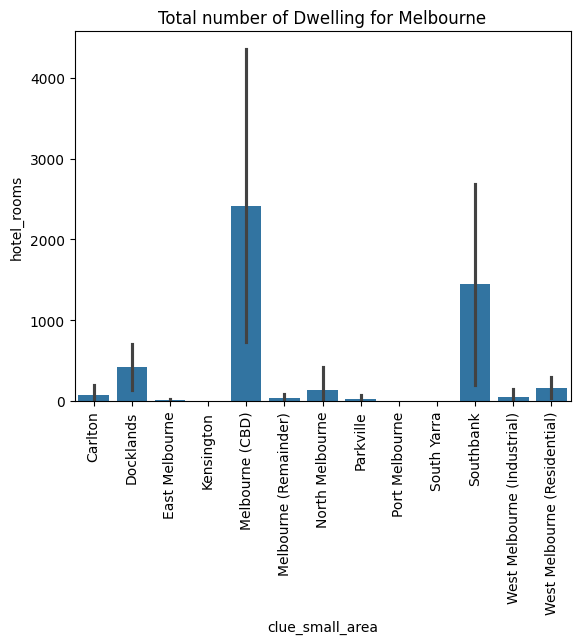

In [ ]:
dev_mon(develop_monitor)

In [ ]:
def dev_mon(data):
    '''
      to visualise the resi_dwellings data
    '''
    ax = sns.boxplot(
    y='resi_dwellings',
    x = 'clue_small_area',
    data = develop_monitor

        )
    warnings.filterwarnings('ignore')
    sns.set_style("whitegrid")
    plt.xticks(rotation =90)
    plt.title('Total number of resi_dwellings for Melbourne')
    plt.show()


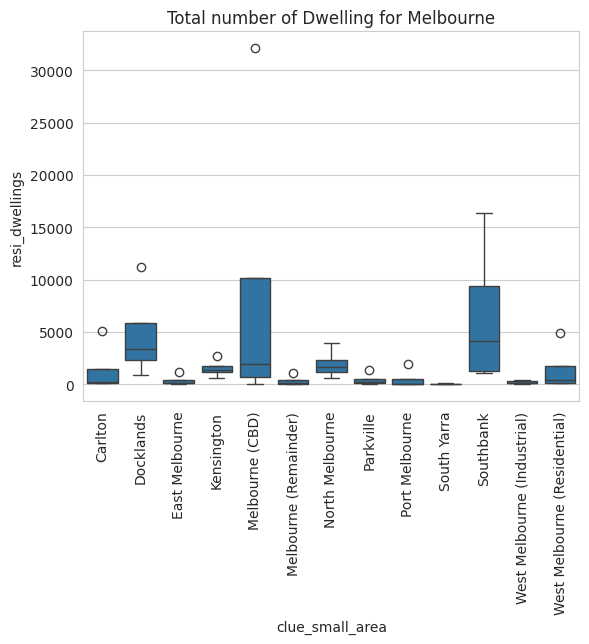

In [ ]:
dev_mon(develop_monitor)

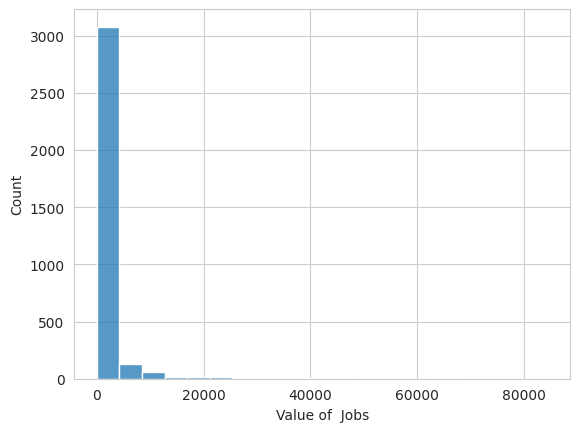

<Figure size 1000x1000 with 0 Axes>

In [ ]:
sns.histplot(dataset2.Value,bins=20)
plt.xlabel("Value of  Jobs")
plt.figure(figsize=(10,10))
plt.show()

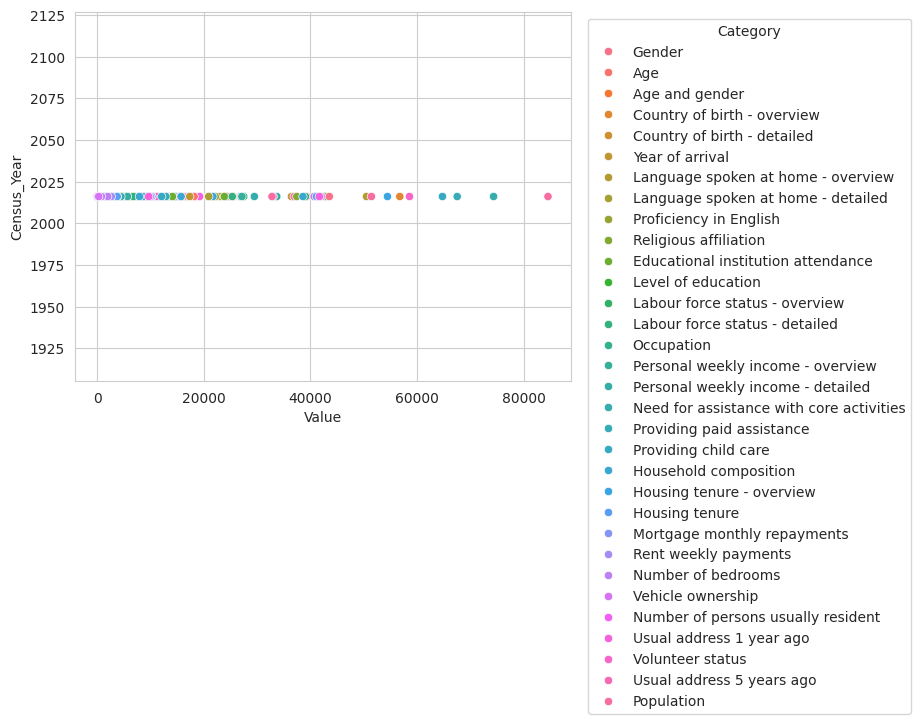

In [ ]:
p = sns.scatterplot(data=dataset2,x="Value", y="Census_Year", hue="Category", legend=True )
sns.move_legend(p, "upper right", bbox_to_anchor=(1.7, 1))

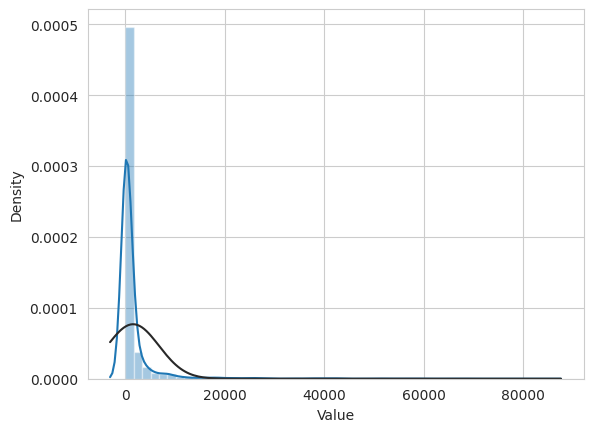

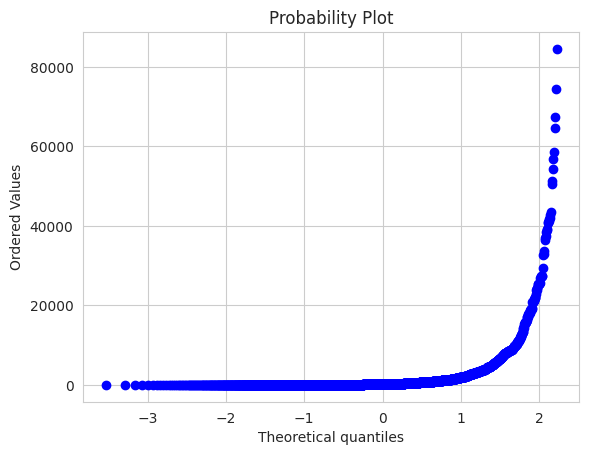

In [ ]:
sns.distplot(dataset2['Value'], fit=norm)
fig = plt.figure()
prob = stats.probplot(dataset2['Value'], plot=plt)

([0, 1, 2, 3],
 [Text(0, 0, 'Large business'),
  Text(1, 0, 'Medium business'),
  Text(2, 0, 'Non employing'),
  Text(3, 0, 'Small business')])

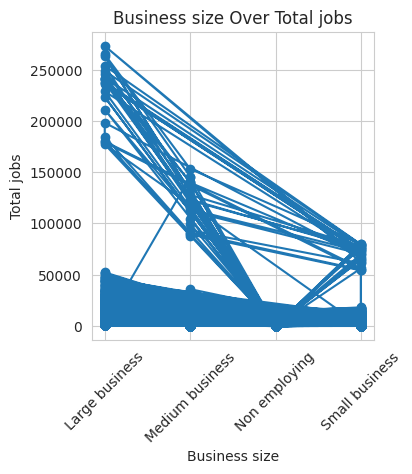

In [ ]:
plt.figure(figsize=(8,4))

# Subplot 1: Pedestrian counts over time (daily)
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.plot(dataset3['Business size'], dataset3['Total jobs'], marker="o", linestyle="-")
plt.title('Business size Over Total jobs')
plt.xlabel('Business size')
plt.ylabel('Total jobs')
plt.grid(True)
plt.xticks(rotation=45)